# Exploratory Data Analysis in Python

#### Course Description
How do we get from data to answers? Exploratory data analysis is a process for exploring datasets, answering questions, and visualizing results. This course presents the tools you need to clean and validate data, to visualize distributions and relationships between variables, and to use regression models to predict and explain. You'll explore data related to demographics and health, including the National Survey of Family Growth and the General Social Survey. But the methods you learn apply to all areas of science, engineering, and business. You'll use Pandas, a powerful library for working with data, and other core Python libraries including NumPy and SciPy, StatsModels for regression, and Matplotlib for visualization. With these tools and skills, you will be prepared to work with real data, make discoveries, and present compelling results.

## [1] Read, clean, and validate

The first step of almost any data project is to read the data, check for errors and special cases, and prepare data for analysis. This is exactly what you'll do in this chapter, while working with a dataset obtained from the National Survey of Family Growth.

### DataFrames and Series

##### Using data to answer questions
What is the average birth weight of babies in the United States?
- Find appropriate data, or collect it
- Read data in development environment
- Prepare for analysis: clean and validate

#### National Survey of Family Growth  (NSFG) Dataset
- from National Center for Health Statistics
- 2013-2015 dataset which includes information about a representative sample of women in the US and their children

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nsfg = pd.read_hdf('datasets/nsfg.hdf5', 'nsfg')
type(nsfg)

pandas.core.frame.DataFrame

- contains one row for each pregnancy for each of the women who participated in the survey, and one column for each variable

In [3]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [4]:
nsfg.shape

(9358, 10)

In [5]:
# index
# list of variables names, which are strings
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [6]:
pounds = nsfg['birthwgt_lb1']
type(pounds)

pandas.core.series.Series

- contains the birth weights, in poounds, of the live births (or in the case of multiple births, the first baby).

In [7]:
pounds.head()

0    5.0
1    4.0
2    5.0
3    NaN
4    8.0
Name: birthwgt_lb1, dtype: float64

- NaN - the pregnancy did not end in live birth, so birth weight is inapplicable

---

**Read the codebook**

When you work with datasets like the NSFG, it is important to read the documentation carefully. If you interpret a variable incorrectly, you can generate nonsense results and never realize it. So before you start coding, you'll need to get familiar with the NSFG codebook, which describes every variable.

Here is the documentation from the NSFG codebook for "BIRTHWGT_OZ1":

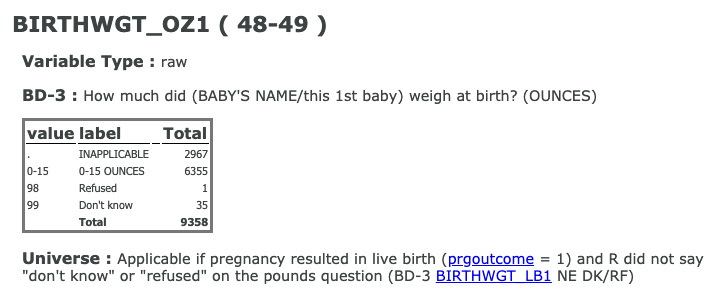

How many respondents refused to answer this question?

> **1**

**Exploring the NSFG data**

To get the number of rows and columns in a DataFrame, you can read its `shape` attribute.

To get the column names, you can read the `columns` attribute. The result is an Index, which is a Pandas data structure that is similar to a list. Let's begin exploring the NSFG data! It has been pre-loaded for you into a DataFrame called `nsfg`.

- Calculate the number of rows and columns in the DataFrame `nsfg`.

In [8]:
# Display the number of rows and columns
nsfg.shape

(9358, 10)

- Display the names of the columns in `nsfg`.

In [9]:
# Display the names of the columns
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

- Select the column `'birthwgt_oz1'` and assign it to a new variable called `ounces`.

In [10]:
# Select column birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']

- Display the first 5 elements of `ounces`.

In [11]:
ounces.head()

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64

### Clean and Validate

#### Selecting columns

In [12]:
# contains the pound part of birth weight
pounds = nsfg['birthwgt_lb1']

In [13]:
# contains the ounce part of birth weight
ounces = nsfg['birthwgt_oz1']

#### Validating data
- one part of validation is confirming that we are interpreting the data correctly

#### Ways to validate data
1. Validate the results by comparing them to the codebook, which lists the values and their frequencies.
2. Use `describe()` which computes the summary statistics like mean, std, min, and max.

In [14]:
# see what value appears in pounds and how many times each value appears
pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

> Most frequent values are 6-8 pounds 
> There are light babies, a very few heavy babies, and two values: 98 and 99 (indicates missing data)

In [15]:
pounds.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

- before properly get the value of mean, the 98 and 99 should be replaced with NaN to represent the missing data

#### Replace
- takes a list of values we want to replace and the value we want to replace them with

In [16]:
pounds = pounds.replace([98, 99], np.nan)
pounds.describe().to_frame()

,birthwgt_lb1
count,6390.000000
mean,6.703286
std,1.429265
min,0.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,17.000000


In [17]:
ounces.replace([98, 99], np.nan, inplace = True)

#### Arithmetic with Series

In [18]:
# convert from ounces to pounds, divide by 16 (there are 16 ounces in a pound)
birth_weight = pounds + ounces / 16.0
birth_weight.describe().to_frame()

,0
count,6355.000000
mean,7.120978
std,1.422236
min,0.000000
25%,6.375000
50%,7.187500
75%,8.000000
max,17.937500


### Back to the question

**What is the average birth weight for babies in the US?**


**Validate a variable**

In the NSFG dataset, the variable 'outcome' encodes the outcome of each pregnancy as shown below:

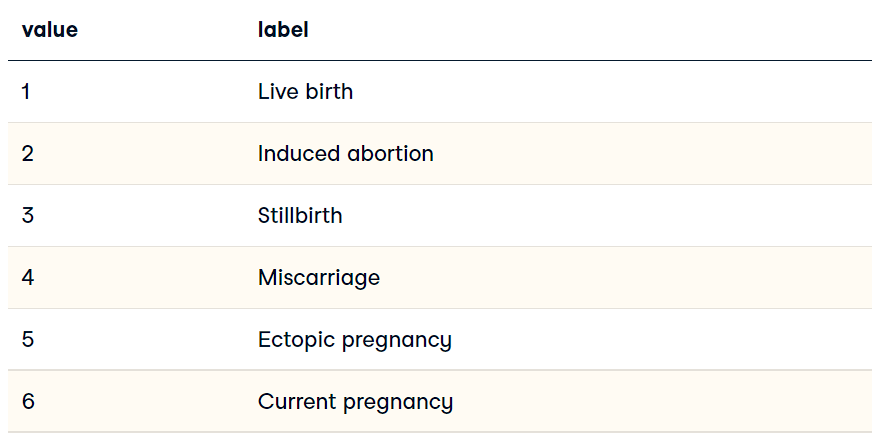

The `nsfg` DataFrame has been pre-loaded for you. Explore it in the IPython Shell and use the methods Allen showed you in the video to answer the following question: **How many pregnancies in this dataset ended with a live birth?**

In [19]:
pounds.value_counts().sum()

6390

**Clean a variable**

In the NSFG dataset, the variable `'nbrnaliv'` records the number of babies born alive at the end of a pregnancy.

If you use `.value_counts()` to view the responses, you'll see that the value `8` appears once, and if you consult the codebook, you'll see that this value indicates that the respondent refused to answer the question.

Your job in this exercise is to replace this value with `np.nan`. Recall from the video how Allen replaced the values `98` and `99` in the `ounces` column using the `.replace()` method:

`ounces.replace([98, 99], np.nan, inplace=True)`

- In the `'nbrnaliv'` column, replace the value `8`, in place, with the special value `NaN`.
- Confirm that the value `8` no longer appears in this column by printing the values and their frequencies.

In [20]:
nsfg['nbrnaliv'].head()

0    1.0
1    1.0
2    1.0
3    NaN
4    1.0
Name: nbrnaliv, dtype: float64

In [21]:
nsfg['nbrnaliv'].value_counts()

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64

In [22]:
# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace = True)

# Print the values and their frequencies
nsfg['nbrnaliv'].value_counts()

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64

**Compute a variable**

For each pregnancy in the NSFG dataset, the variable `'agecon'` encodes the respondent's age at conception, and `'agepreg'` the respondent's age at the end of the pregnancy.

Both variables are recorded as integers with two implicit decimal places, so the value `2575` means that the respondent's age was `25.75`.

- Select `'agecon'` and `'agepreg'`, divide them by `100`, and assign them to the local variables `agecon` and `agepreg`.

In [23]:
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

- Compute the difference, which is an estimate of the duration of the pregnancy. Keep in mind that for each pregnancy, `agepreg` will be larger than `agecon`.

In [24]:
# Compute the difference
preg_length = agepreg - agecon

- Use `.describe()` to compute the mean duration and other summary statistics.

In [25]:
# Compute summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


> A variable that's computed from other variables is sometimes called a 'recode'.

### Filter and visualize

#### Histogram
- shows the distribution, the values and how often they appear
- pyplot doesn't work with NaNs, so `.dropna()` is used

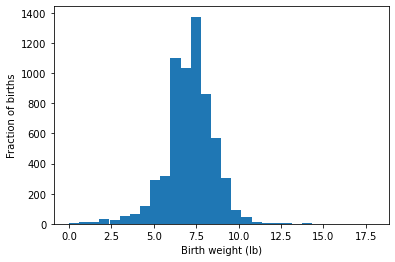

In [26]:
plt.hist(birth_weight.dropna(), bins = 30)
plt.xlabel('Birth weight (lb)')
plt.ylabel('Fraction of births')
plt.show()

- The tail is longer on the left than on the right -> there are more light babies than heavy babies. Makes sense as the distribution includes some babies that were born preterm  
- Most common duration for pregnancy is 39 weeks, which is "full term". "Preterm" means less than 37 weeks.
- To see which babies are preterm, use `prglngth` column, which records pregnancy length in weeks

### Boolean Series

In [28]:
preterm = nsfg['prglngth'] < 37
preterm.head()

0    False
1     True
2     True
3     True
4    False
Name: prglngth, dtype: bool

In [29]:
preterm.sum()

3742

In [30]:
preterm.mean()

0.39987176747168196

> About 40% of the births in the dataset are preterm.

In [27]:
nsfg[nsfg['prglngth'] < 37]

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
5,60420,4,NaN,NaN,3,NaN,3391,3391.0,NaN,2903.782914
6,60423,1,5.0,0.0,35,1.0,2366,2433.0,23.0,2738.498331
...,...,...,...,...,...,...,...,...,...,...
9347,70612,1,9.0,8.0,36,1.0,3766,3833.0,53.0,4835.247136
9348,70613,4,NaN,NaN,2,NaN,2708,2708.0,NaN,20665.907733
9351,70615,4,NaN,NaN,8,NaN,1658,1666.0,NaN,8117.554461
9353,70615,1,4.0,11.0,35,1.0,1758,1825.0,22.0,8117.554461


### Filtering
- select only rows that satisfy a condition or meet some criterion

In [34]:
preterm_weight = birth_weight[preterm]
preterm_weight.mean()

5.577598314606742

In [35]:
# to select full term babies, use tilde (~) operator [logical NOT]
full_term_weight = birth_weight[~preterm]
full_term_weight.mean()

7.372323879231473

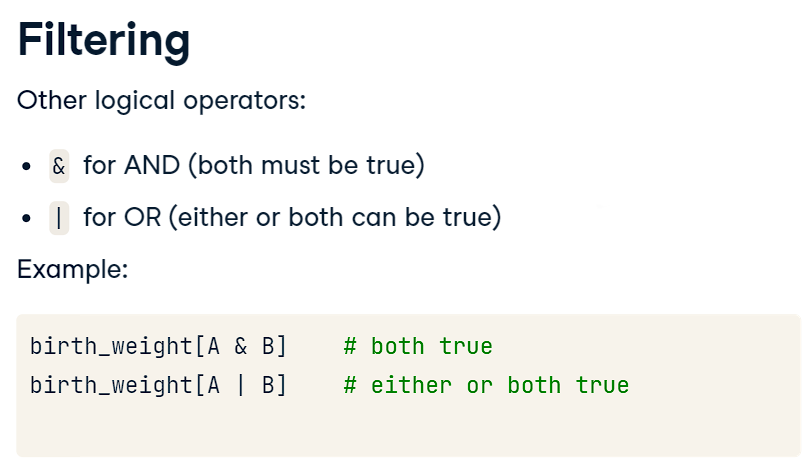

### Resampling
- NSFG is not representation of the whole population
- Some groups are 'oversampled'
    - oversampling ensures that you have enough people in every subgroup to get reliable statistics, but it makes the analysis a little more complicated
- To correct oversampling: use `resample_rows_weighted()`

**Make a histogram**

Histograms are one of the most useful tools in exploratory data analysis. They quickly give you an overview of the distribution of a variable, that is, what values the variable can have, and how many times each value appears.

As we saw in a previous exercise, the NSFG dataset includes a variable `'agecon'` that records age at conception for each pregnancy. Here, you're going to plot a histogram of this variable. You'll use the `bins` parameter that you saw in the video, and also a new parameter - `histtype` - which you can read more about here in the matplotlib documentation. Learning how to read documentation is an essential skill. 

- Plot a histogram of `agecon` with `20` bins.

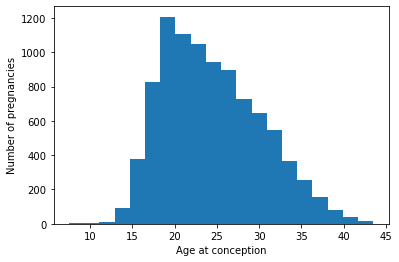

In [37]:
# Plot the histogram
plt.hist(agecon, bins = 20)

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

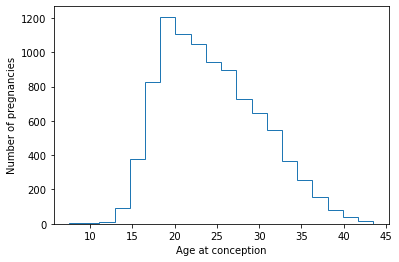

In [38]:
# Plot the histogram
plt.hist(agecon, bins =  20, histtype = 'step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

**Compute birth weight**

Now let's pull together the steps in this chapter to compute the average birth weight for full-term babies.

I've provided a function, `resample_rows_weighted`, that takes the NSFG data and resamples it using the sampling weights in `wgt2013_2015`. The result is a sample that is representative of the U.S. population.

Then I extract `birthwgt_lb1` and `birthwgt_oz1`, replace special codes with NaN, and compute total birth weight in pounds, `birth_weight`.

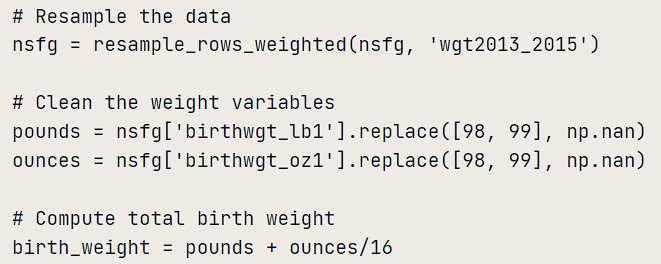

- Make a Boolean Series called `full_term` that is true for babies with `'prglngth'` greater than or equal to 37 weeks.
- Use `full_term` and `birth_weight` to select birth weight in pounds for full-term babies. Store the result in `full_term_weight`.
- Compute the mean weight of full-term babies.

In [39]:
# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth'] >= 37

# Select the weights of full-term babies
full_term_weight = birth_weight[full_term]

# Compute the mean weight of full-term babies
print(full_term_weight.mean())

7.372323879231473


**Filter**

In the previous exercise, you computed the mean birth weight for full-term babies; you filtered out preterm babies because their distribution of weight is different.

The distribution of weight is also different for multiple births, like twins and triplets. In this exercise, you'll filter them out, too, and see what effect it has on the mean.

- Use the variable `'nbrnaliv'` to make a Boolean Series that is `True` for single births (where `'nbrnaliv'` equals `1`) and `False` otherwise.
- Use Boolean Series and logical operators to select single, full-term babies and compute their mean birth weight.
- For comparison, select multiple, full-term babies and compute their mean birth weight.

In [41]:
nsfg['nbrnaliv'] == 1

0        True
1        True
2        True
3       False
4        True
        ...  
9353     True
9354     True
9355     True
9356     True
9357     True
Name: nbrnaliv, Length: 9358, dtype: bool

In [42]:
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[full_term & single]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[full_term & (~single)]
print('Multiple full-term mean:', mult_full_term_weight.mean())


Single full-term mean: 7.385643450184502
Multiple full-term mean: 5.768055555555556
